In [1]:
import pandas as pd
df = pd.read_csv('ipl_data.csv')
print(df.head())

   mid        date                  venue               bat_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0        0            0    222 

C:\Users\user\AppData\Local\Temp\ipykernel_23464\265560314.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matches_count.values,y=matches_count.index, palette="rainbow")


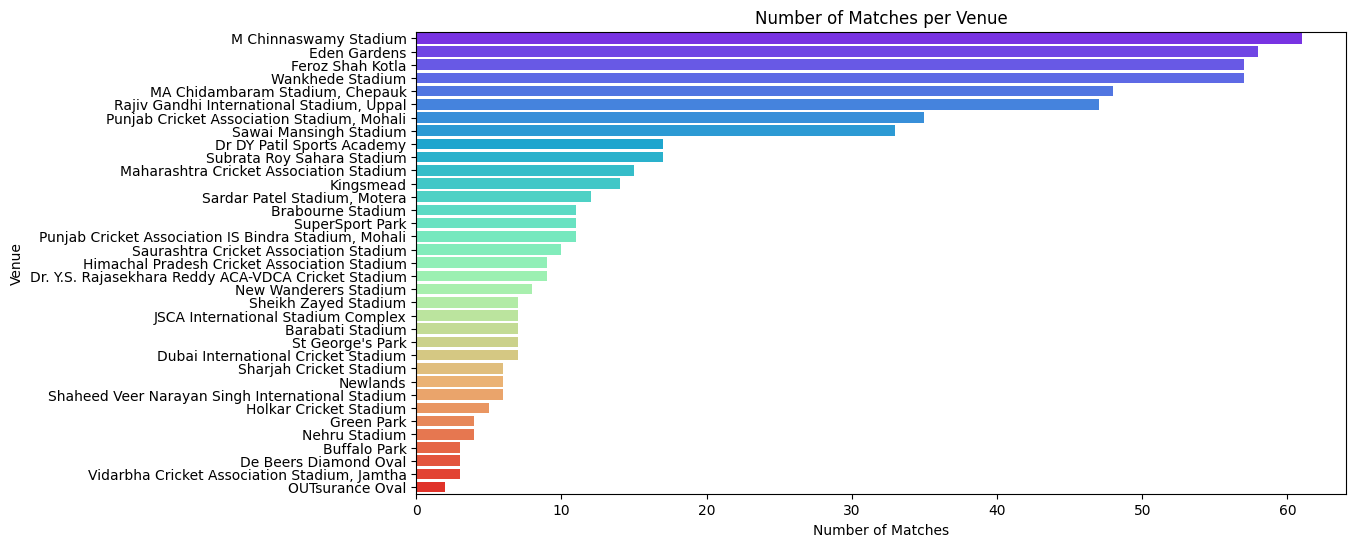

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ipl_data.csv')
data = df.copy()
matches_per_venue = data[['mid', 'venue']].drop_duplicates()
matches_count = matches_per_venue['venue'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=matches_count.values,y=matches_count.index, palette="rainbow")
plt.title('Number of Matches per Venue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23464\344370830.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_by_batsman.values, y=runs_by_batsman.index, palette="pastel")


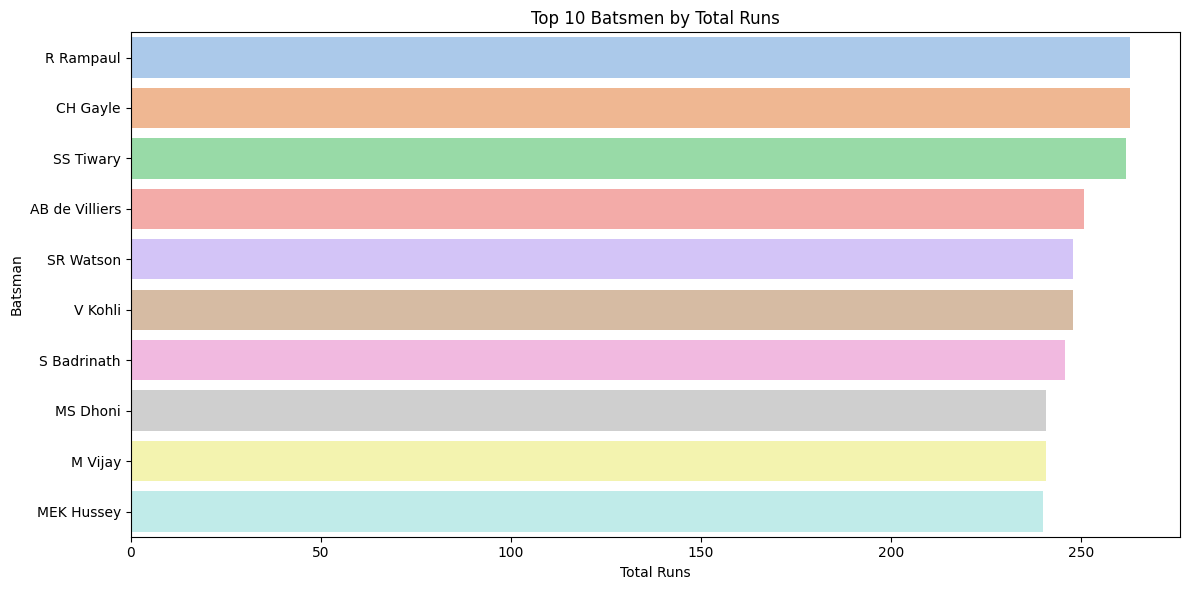

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('ipl_data.csv')
data = df.copy()

runs_by_batsman = data.groupby('batsman')['runs'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=runs_by_batsman.values, y=runs_by_batsman.index, palette="pastel")
plt.title('Top 10 Batsmen by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23464\2149890623.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = wickets_by_bowler.values, y = wickets_by_bowler.index, palette = "muted")


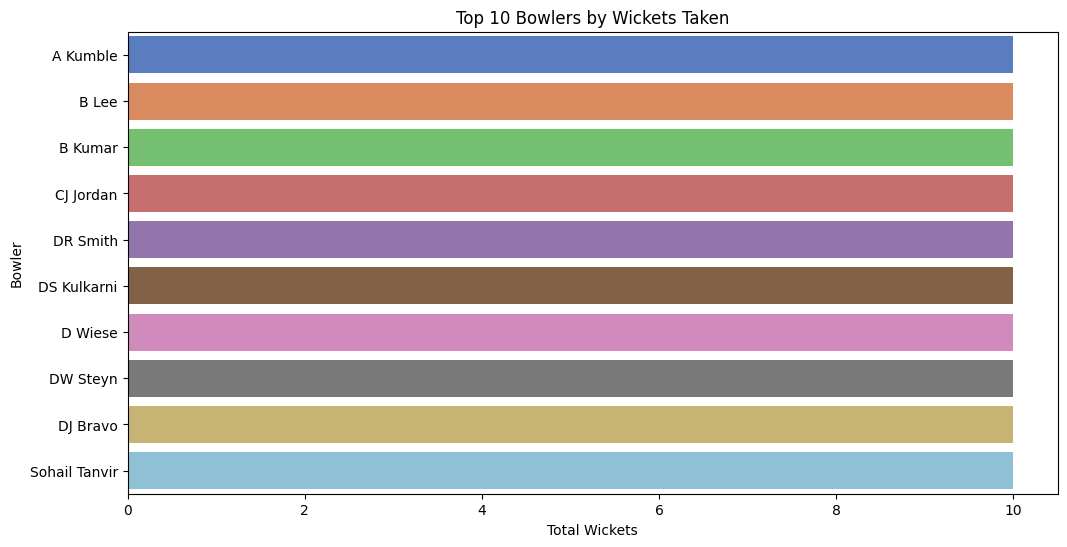

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('ipl_data.csv')
data = df.copy()
wickets_by_bowler = data.groupby('bowler')['wickets'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x = wickets_by_bowler.values, y = wickets_by_bowler.index, palette = "muted")
plt.title('Top 10 Bowlers by Wickets Taken')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['bat_team', 'bowl_team', 'venue', "batsman","bowler"]
data_encoded = data.copy()
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

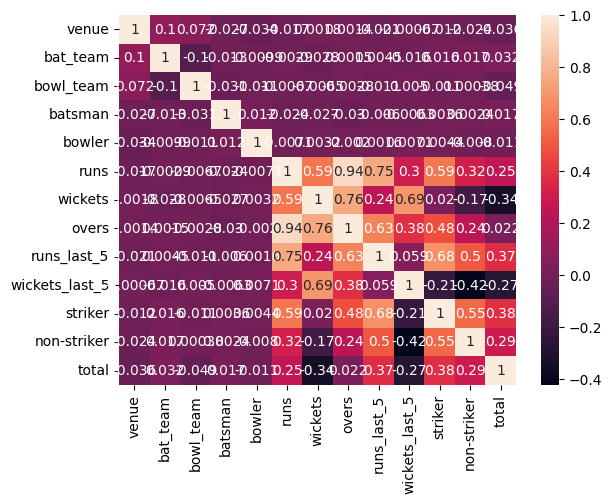

In [17]:
data_corr=data_encoded.drop(columns=["date","mid"],axis=1)
sns.heatmap(data_corr.corr(),annot=True)
plt.show()

In [18]:
feature_cols = ['bat_team', 'bowl_team', 'venue', 'runs', 'wickets', 'overs','striker','batsman','bowler']
X = data_encoded[feature_cols]
y = data_encoded['total']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dense(216, activation='relu'),  
    keras.layers.Dense(1, activation='linear') 
])

huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)

ModuleNotFoundError: No module named 'tensorflow'